In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [ ]:
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df = pd.read_csv(url)


In [ ]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
df.shape

(158, 12)

There is 158 rows and 12 columnn are there.there is one of the target variable which is Happiness Score column.

In [ ]:
#Checking the datatypes of the columns
df.dtypes

,0
Country,object
Region,object
Happiness Rank,int64
Happiness Score,float64
Standard Error,float64
Economy (GDP per Capita),float64
Family,float64
Health (Life Expectancy),float64
Freedom,float64
Trust (Government Corruption),float64


In [ ]:
#checking the null values in the columns
df.isnull().sum()

,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Standard Error,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0


Found no null values found the dataset

<Axes: >

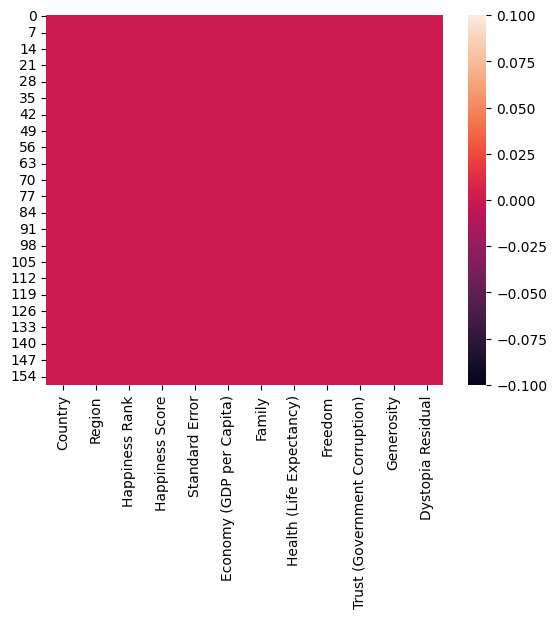

In [ ]:
#Checking the null values in heat map
sns.heatmap(df.isnull())

In [ ]:
#Count the values in each columns
df.nunique()

,0
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


Unique values: Each column contains mostly unique values, with slight duplication in certain columns like Happiness Rank, Happiness Score, Health, and Trust.

In [ ]:
for i in df.columns:
  print(df[i].value_counts())
  print("\n")

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64


Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64


Happiness Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64


Standard Error
0

In [ ]:
#checking the stataticla information of the dataset
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The dataset shows significant variability across different countries, particularly in GDP, life expectancy, and freedom. The data is fairly well distributed across the happiness factors, but the outliers in some of the columns like Dystopia Residual, GDP, and Trust suggest that some countries are far removed from the mean.

In [ ]:
#sSeperating the numercil columns and categorical columns
categorical_columns=[]
numerical_columns=[]
for i in df.columns:
  if df[i].dtypes=="object":
    categorical_columns.append(i)
  else:
    numerical_columns.append(i)
print("categorial columns",categorical_columns)
print("Numerical columns",numerical_columns)


categorial columns ['Country', 'Region']
Numerical columns ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


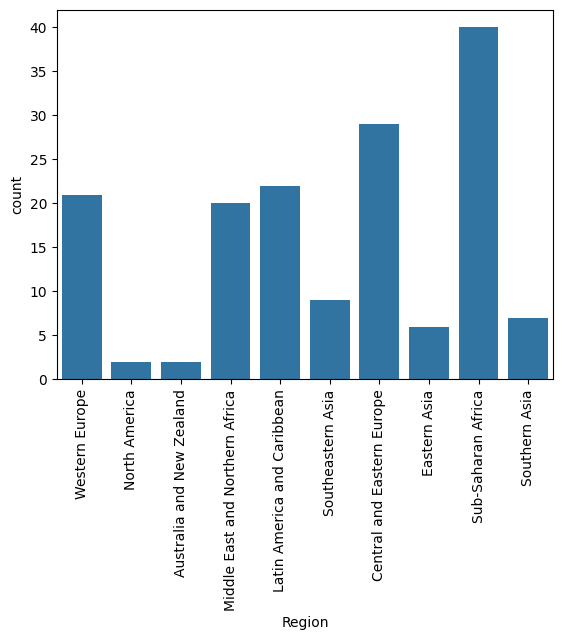

In [ ]:
#Visulize the data
ax=sns.countplot(x="Region",data=df)
plt.xticks(rotation=90)
plt.show()

This bar chart visually represents the distribution of countries by region, showing how certain regions (like Sub-Saharan Africa) dominate in terms of the number of countries in the dataset, while others (like North America) have fewer. This helps in understanding the regional distribution of data, which may also influence the analysis of happiness scores based on regional factors.

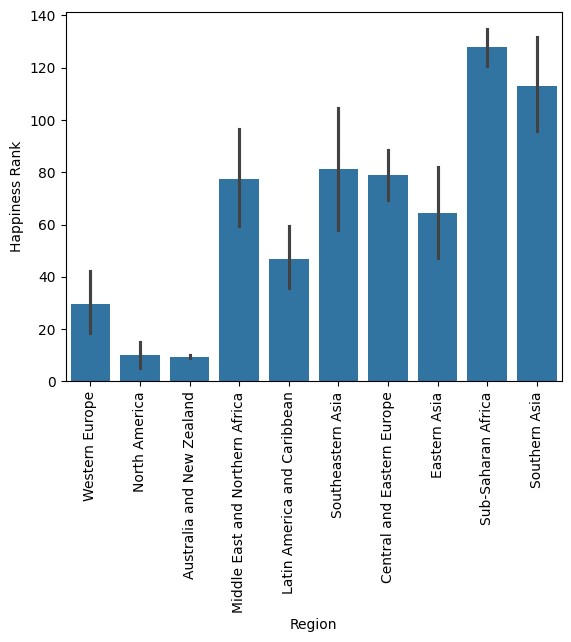

In [ ]:
#now checking the which region has good happines rank or schore
ax=sns.barplot(x="Region",y="Happiness Rank",data=df)
plt.xticks(rotation=90)
plt.show()

Happiness in Western Europe and North America
Based on the provided chart, Western Europe and North America appear to have lower average happiness ranks compared to other regions. This suggests that people in these regions generally report higher levels of happiness

<ipython-input-29-c8bf6db6adef>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-29-c8bf6db6adef>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-29-c8bf6db6adef>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

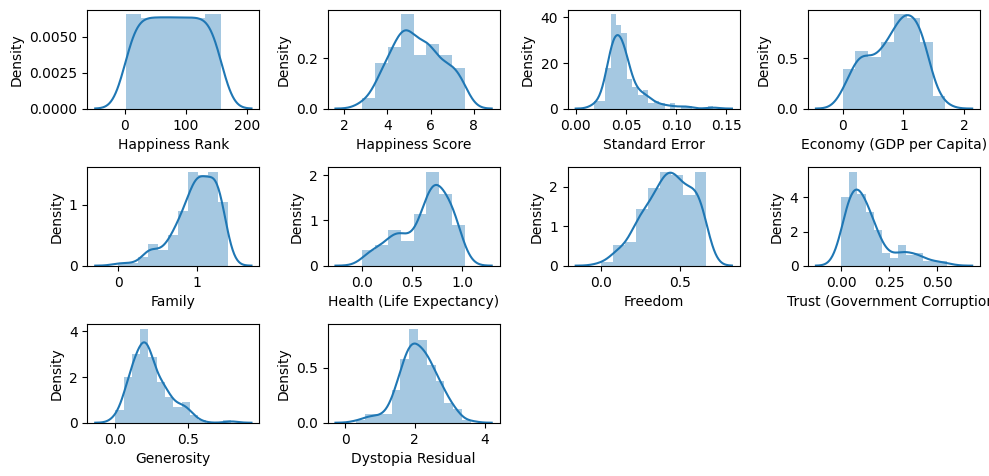

In [ ]:
#Distributon of the data
#Now check the distribution of the data in remaing column
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_columns:
  if plotnumber<=25:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()


Almost  Each histogram has a bell-shaped curve, indicating the frequency distribution of each variable.

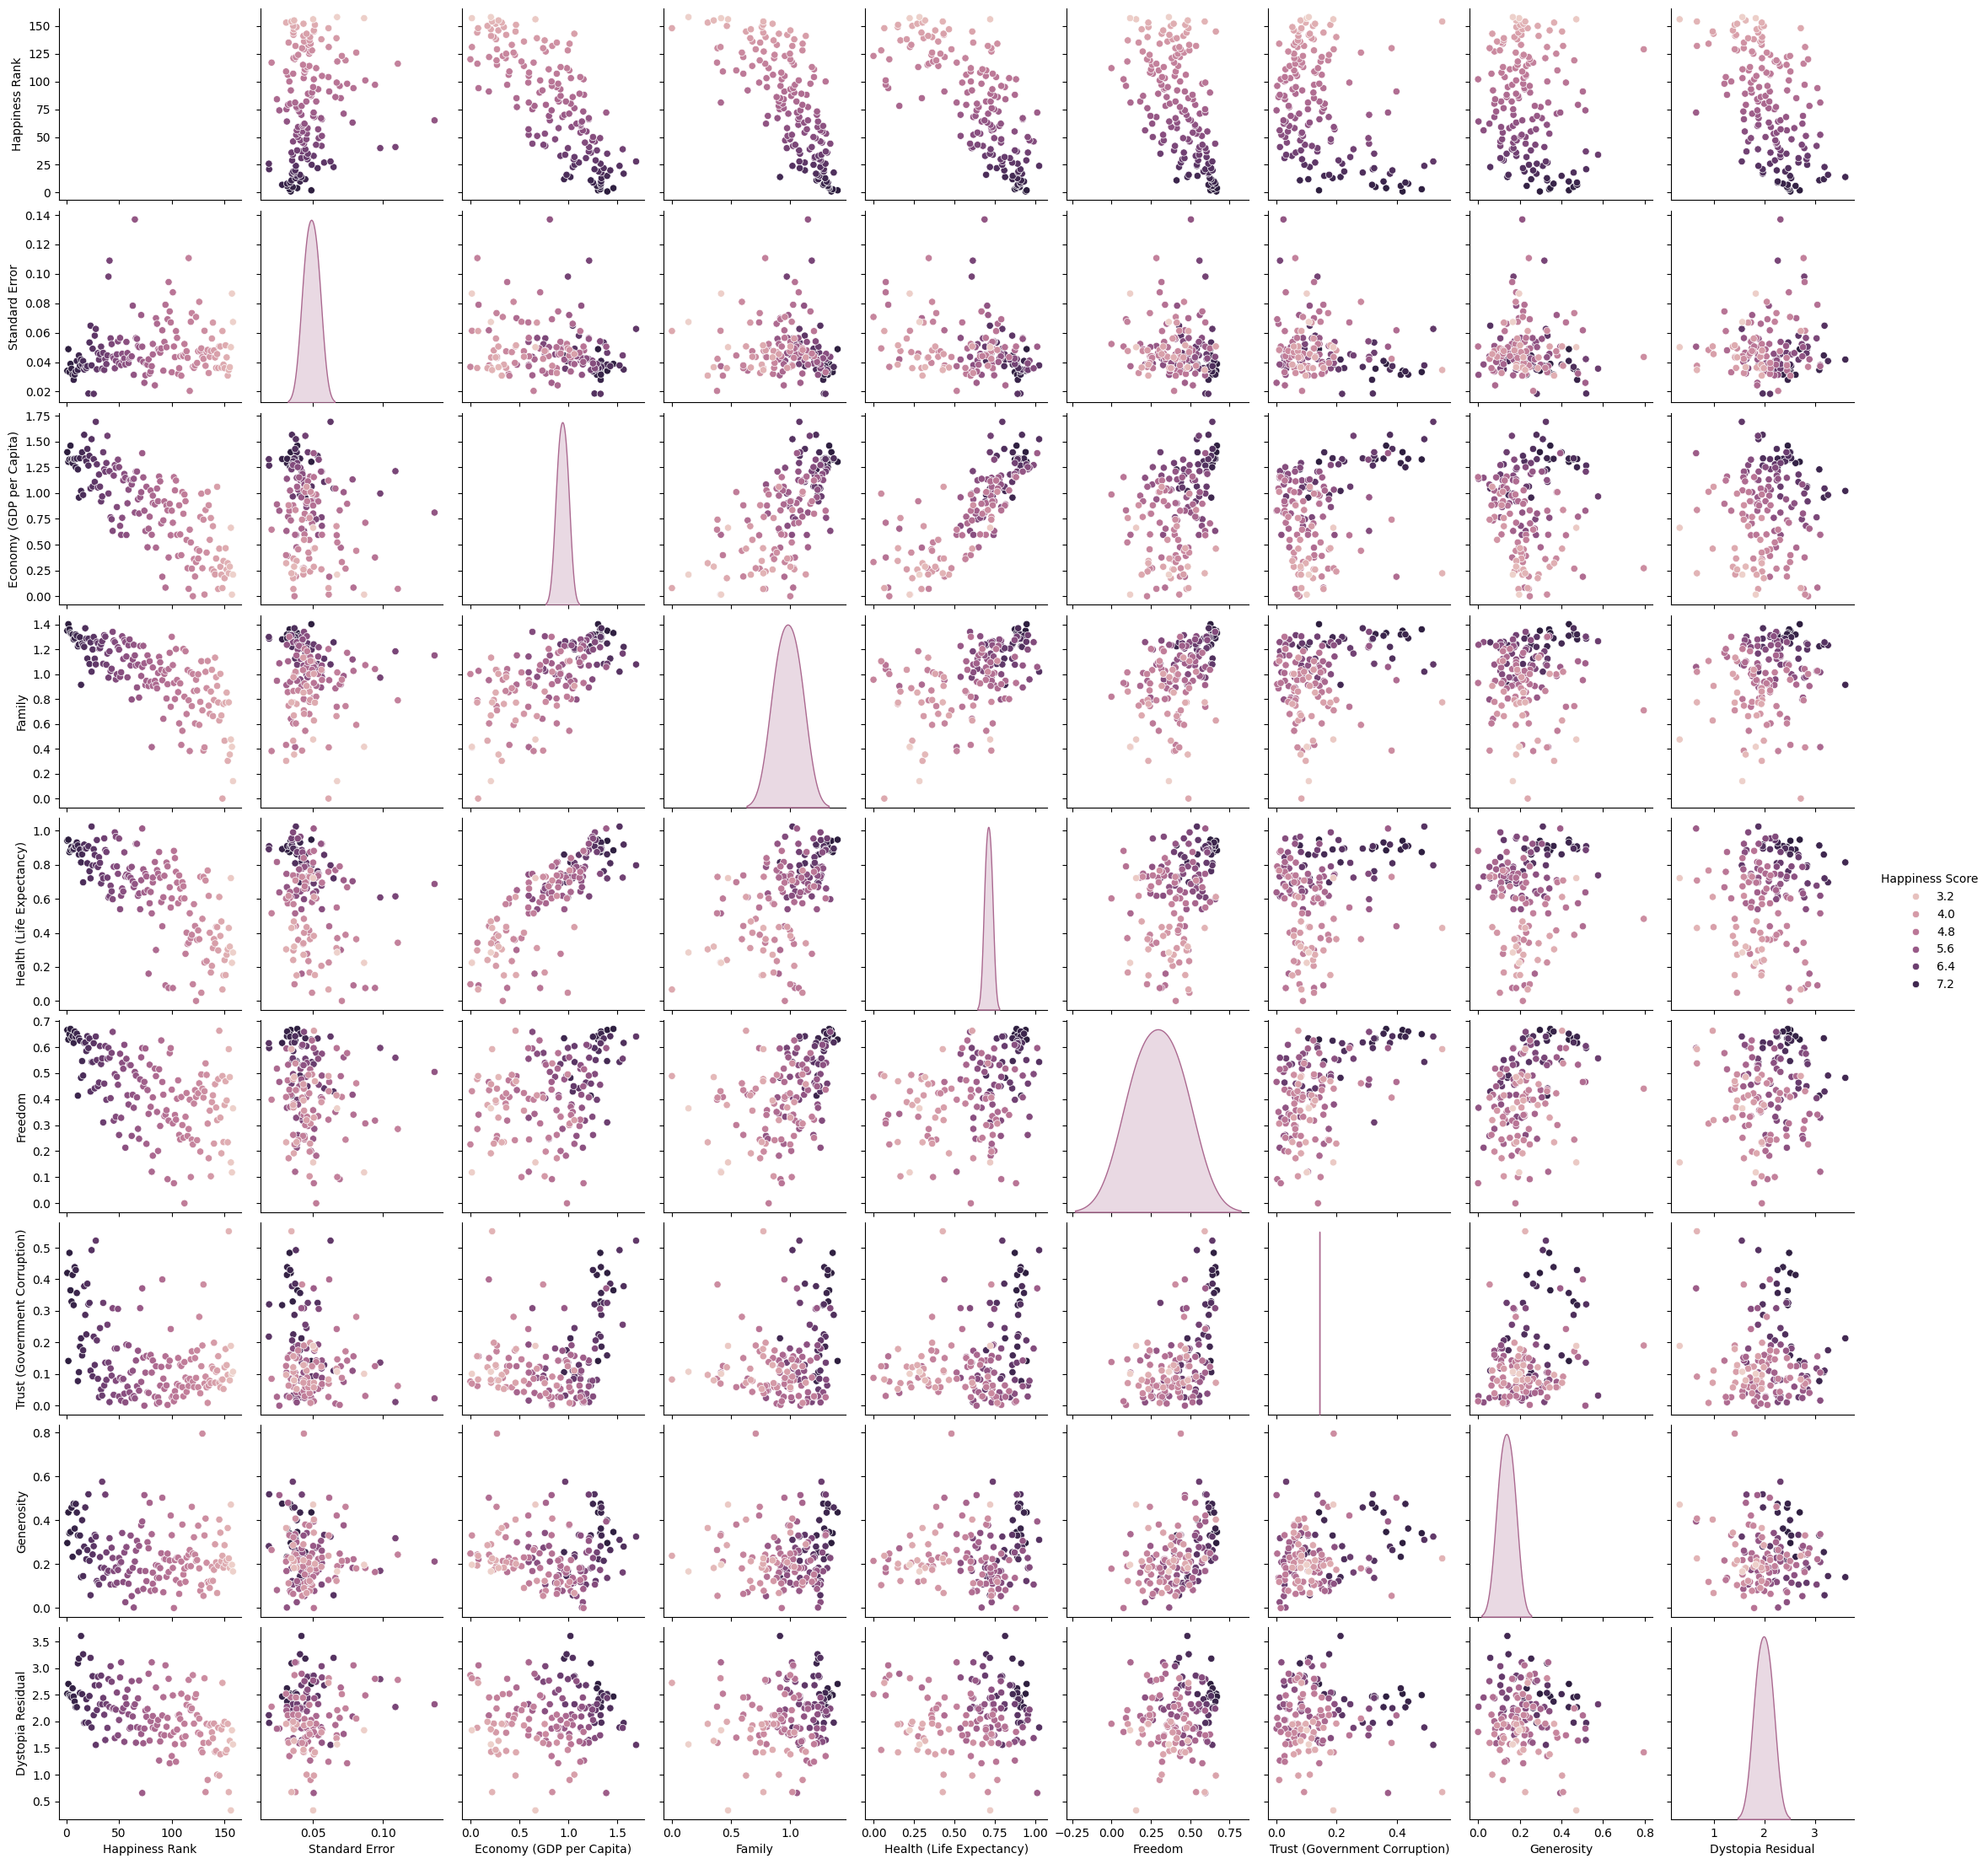

In [ ]:
#Multivariate Analasys
sns.pairplot(df,hue="Happiness Score")
plt.show()

Inverse Relationship: Happiness Rank is inversely related to positive factors like GDP per capita, family, and health.
Positive Correlation: Stronger economies and better life expectancy are often associated with each other.
Weaker Relationships: Trust in government and generosity show weaker relationships with other happiness indicators.

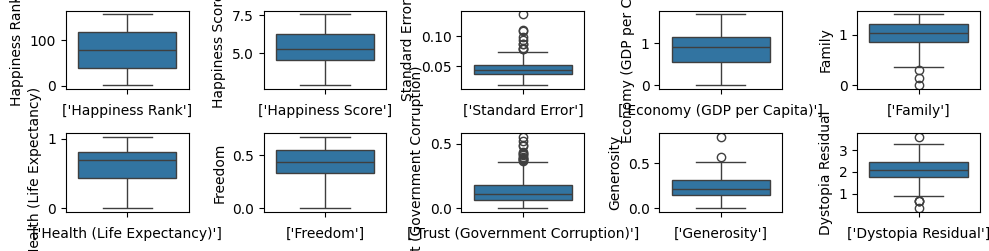

In [ ]:
#Checking the outliers
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_columns:
  if plotnumber<=17:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel([col])
    plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()





Some variables (like Standard Error, Trust (Government Corruption), and Generosity) have notable outliers, meaning that a few countries differ significantly in these metrics compared to the rest.

In [ ]:
# Removing the outliers using the Z-score
from scipy.stats import zscore

# List the columns you want to check for outliers
columns = ["Standard Error", "Trust (Government Corruption)", "Generosity", "Family", "Dystopia Residual"]

# Calculate the Z-scores for the specified columns
z = np.abs(zscore(df[columns]))

# Define the threshold for identifying outliers
threshold = 3

# Filter the rows where all Z-scores are below the threshold (i.e., no outliers)
new_df = df[(z < threshold).all(axis=1)]

# Display the filtered DataFrame
print(new_df)








          Country              Region  Happiness Rank  Happiness Score  \
0     Switzerland      Western Europe               1            7.587   
1         Iceland      Western Europe               2            7.561   
2         Denmark      Western Europe               3            7.527   
3          Norway      Western Europe               4            7.522   
4          Canada       North America               5            7.427   
..            ...                 ...             ...              ...   
150   Ivory Coast  Sub-Saharan Africa             151            3.655   
151  Burkina Faso  Sub-Saharan Africa             152            3.587   
152   Afghanistan       Southern Asia             153            3.575   
154         Benin  Sub-Saharan Africa             155            3.340   
156       Burundi  Sub-Saharan Africa             157            2.905   

     Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.3495

In [ ]:
#Checking for Skewness
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in new_df.columns:
  if new_df[i].dtypes=="object":
    # Use new_df instead of df to ensure matching shapes
    new_df[i]=oe.fit_transform(new_df[i].values.reshape(-1,1))

<ipython-input-48-ae4c3a8d8b8d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[i]=oe.fit_transform(new_df[i].values.reshape(-1,1))
<ipython-input-48-ae4c3a8d8b8d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[i]=oe.fit_transform(new_df[i].values.reshape(-1,1))


In [ ]:
new_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,129.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,57.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,36.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,101.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,65.0,8.0,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20.0,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [ ]:
new_df.skew()

,0
Country,0.000000
Region,-0.096985
Happiness Rank,0.003268
Happiness Score,0.169740
Standard Error,1.243048
Economy (GDP per Capita),-0.390657
Family,-0.811340
Health (Life Expectancy),-0.747711
Freedom,-0.400867
Trust (Government Corruption),1.272530


In [ ]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157]),
 array([1, 0, 0, 0, 2, 3, 1, 4, 3]))

In [ ]:
z.iloc[64,0]

5.209813157066768

In [ ]:
# remving the skewness using the qube root metod
new_df["Standard Error"]=np.cbrt(new_df["Standard Error"])
new_df.skew()

<ipython-input-61-141c550924bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Standard Error"]=np.cbrt(new_df["Standard Error"])


,0
Country,0.000000
Region,-0.096985
Happiness Rank,0.003268
Happiness Score,0.169740
Standard Error,0.528395
Economy (GDP per Capita),-0.390657
Family,-0.811340
Health (Life Expectancy),-0.747711
Freedom,-0.400867
Trust (Government Corruption),1.272530


In [ ]:
# remving the skewness using the qube root metod
new_df["Trust (Government Corruption)"]=np.cbrt(new_df["Trust (Government Corruption)"])
new_df.skew()

<ipython-input-62-7b3cec4dad5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Trust (Government Corruption)"]=np.cbrt(new_df["Trust (Government Corruption)"])


,0
Country,0.000000
Region,-0.096985
Happiness Rank,0.003268
Happiness Score,0.169740
Standard Error,0.528395
Economy (GDP per Capita),-0.390657
Family,-0.811340
Health (Life Expectancy),-0.747711
Freedom,-0.400867
Trust (Government Corruption),-0.064568


Removed skewnwss and outliers

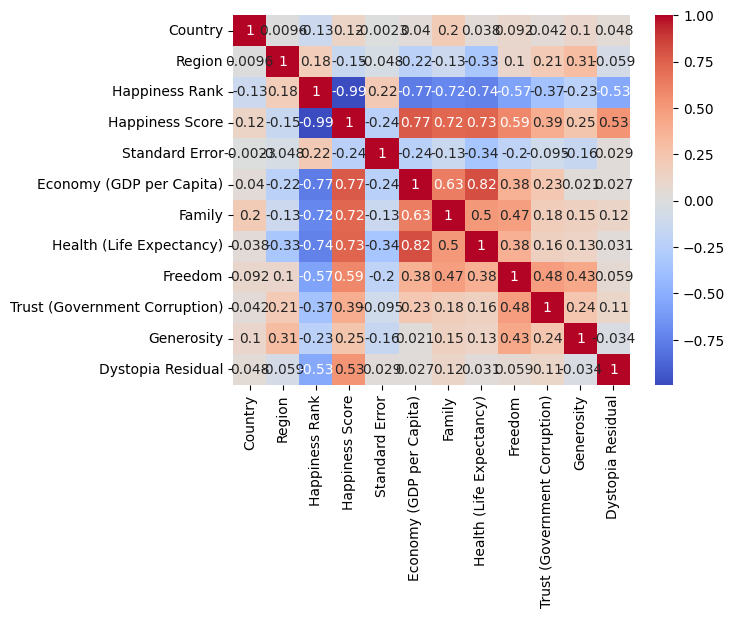

In [ ]:
sns.heatmap(new_df.corr(),annot=True,cmap="coolwarm")
plt.show()

or example, a high positive correlation between Happiness Score and Economy (GDP per Capita) suggests that countries with higher GDP per capita tend to have higher happiness scores.
A negative correlation between Happiness Rank and Trust (Government Corruption) indicates that higher trust in government is associated with a better (lower) happiness rank.

In [ ]:
#seperating the feature and label data
X=new_df.drop(["Happiness Score"],axis=True)
y=new_df["Happiness Score"]
print("Feature Dimension",X.shape)
print("Label Dimension",y.shape)

Feature Dimension (149, 11)
Label Dimension (149,)


In [ ]:

#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
#Finding the best random state
maxAcc=0
maxRS=0
for i in range(1,200):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
  lr=LinearRegression()
  lr.fit(X_train,y_train)
  pred=lr.predict(X_test)
  acc=r2_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRS=i
print("maximu r2 socre is ",maxAcc,"on rondom state",maxRS)

maximu r2 socre is  0.9994921501807114 on rondom state 194


Creating train test split


In [ ]:
#Splittig the data into trainig and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=194)

Now checking the one by one all regressions

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
svm=SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

Prediction on test data

In [ ]:
y_pred_lr=lr.predict(X_test)
y_pred_svm=svm.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_dt=dt.predict(X_test)
y_pred_gb=gb.predict(X_test)
df1=pd.DataFrame({"Actual":y_test,"LR":y_pred_lr,"SVM":y_pred_svm,"RF":y_pred_rf,"DT":y_pred_dt,"GB":y_pred_gb})

In [ ]:
df1

,Actual,LR,SVM,RF,DT,GB
148,3.667,3.664381,3.895550,3.58925,3.340,3.628686
87,5.102,5.048651,5.084974,5.11042,5.098,5.094802
146,3.681,3.687988,3.957912,3.84944,3.845,3.817603
10,7.278,7.316504,7.065801,7.26620,7.200,7.288276
6,7.378,7.376518,7.101240,7.29943,7.364,7.402175
18,6.937,6.958722,6.931788,6.96913,6.940,6.944132
125,4.369,4.314311,4.274278,4.28540,4.350,4.333678
130,4.292,4.270549,4.198120,4.04268,4.350,4.297392
106,4.739,4.739375,4.672845,4.78449,4.839,4.777509
0,7.587,7.509449,7.122474,7.38584,7.527,7.536314


In [ ]:
#Finding the performance of them model

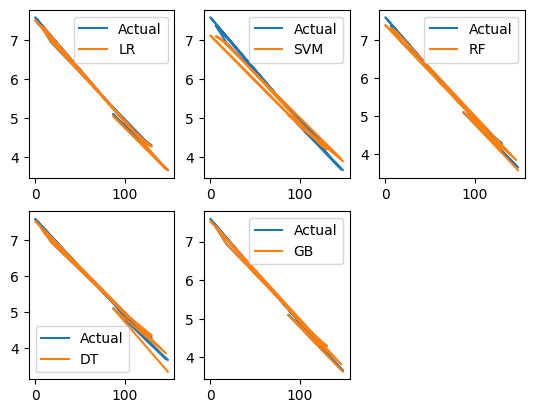

In [ ]:
plt.subplot(231)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["LR"].iloc[0:11],label="LR")
plt.legend()

plt.subplot(232)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["SVM"].iloc[0:11],label="SVM")
plt.legend()

plt.subplot(233)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["RF"].iloc[0:11],label="RF")
plt.legend()

plt.subplot(234)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["DT"].iloc[0:11],label="DT")
plt.legend()

plt.subplot(235)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["GB"].iloc[0:11],label="GB")
plt.legend()


in above model we found Gradient booster and LenearRegression are best model for this dataset

Evaluate out models

In [ ]:
print("R score",r2_score(y_test,y_pred_lr))
print("Mean squared error",mean_squared_error(y_test,y_pred_lr))
print("Mean absolte  error",mean_absolute_error(y_test,y_pred_lr))

R score 0.9994921501807114
Mean squared error 0.0007878420843431831
Mean absolte  error 0.02036242131690278


In [ ]:
print("R score",r2_score(y_test,y_pred_svm))
print("Mean squared error",mean_squared_error(y_test,y_pred_svm))
print("Mean absolte  error",mean_absolute_error(y_test,y_pred_svm))

R score 0.9816174972376894
Mean squared error 0.028517307167674356
Mean absolte  error 0.1350926837864996


In [ ]:
print("R score",r2_score(y_test,y_pred_rf))
print("Mean squared error",mean_squared_error(y_test,y_pred_rf))
print("Mean absolte  error",mean_absolute_error(y_test,y_pred_rf))

R score 0.9958521834650723
Mean squared error 0.006434627522222237
Mean absolte  error 0.05925800000000045


In [ ]:
print("R score",r2_score(y_test,y_pred_dt))
print("Mean squared error",mean_squared_error(y_test,y_pred_dt))
print("Mean absolte  error",mean_absolute_error(y_test,y_pred_dt))

R score 0.9907528741028822
Mean squared error 0.014345333333333337
Mean absolte  error 0.08519999999999998


In [ ]:
print("R score",r2_score(y_test,y_pred_gb))
print("Mean squared error",mean_squared_error(y_test,y_pred_gb))
print("Mean absolte  error",mean_absolute_error(y_test,y_pred_gb))

R score 0.9984187639134984
Mean squared error 0.0024530171852241004
Mean absolte  error 0.03434543212471887


Overall, Linear  regression model performs extremely well on this dataset, with minimal errors and very high accuracy in explaining the variance in the target variable. However, it's worth checking for potential overfitting if this is on the training set

In [ ]:
from sklearn.model_selection import cross_val_score
# Assuming `model` is your regression model and `X`, `y` are your data
scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", scores)
print("Average R-squared:", scores.mean())


Cross-validated R-squared scores: [0.92777689 0.9726844  0.94135038 0.95343677 0.99129944]
Average R-squared: 0.9573095743464173


 The mean R² value across all 5 folds is 0.9573. This shows that, on average, your model explains 95.73% of the variance in the target variable, which confirms the model’s high accuracy and good generalization.

Save the model


In [ ]:
import joblib
joblib.dump(lr,"model_joblib_lr")

['model_joblib_lr']

In [ ]:
#Use the model
model=joblib.load("model_joblib_lr")

In [ ]:
df
